In [2]:
import rasterio # for the extension to load
import xarray
import geopandas as gpd
from rasterio.windows import Window
from rasterio.plot import show
import rasterio.mask
import fiona
import rioxarray as rxr

import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
mountain_path = "../data/GlobalMountainsK3Binary/k1binary.tif"
mt_ds = rxr.open_rasterio(mountain_path)
mt_ds

<xarray.DataArray (band: 1, y: 21600, x: 43200)>
[933120000 values with dtype=uint8]
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 -180.0 -180.0 -180.0 -180.0 ... 180.0 180.0 180.0
  * y            (y) float64 90.01 90.0 90.0 89.99 ... -89.96 -89.97 -89.98
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:           Area
    STATISTICS_COVARIANCES:  0
    STATISTICS_MAXIMUM:      1
    STATISTICS_MEAN:         1
    STATISTICS_MINIMUM:      1
    STATISTICS_SKIPFACTORX:  1
    STATISTICS_SKIPFACTORY:  1
    STATISTICS_STDDEV:       0
    _FillValue:              0
    scale_factor:            1.0
    add_offset:              0.0

In [4]:
dis_path = "../data/HydroRIVERS_v10_shp/raster/reduced_HydroRIVERS_v10.tif"
dis_ds = rxr.open_rasterio(dis_path)
dis_ds

<xarray.DataArray (band: 1, y: 1345, x: 3119)>
[4195055 values with dtype=uint64]
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 -159.8 -159.7 -159.6 -159.5 ... 151.8 151.9 152.0
  * y            (y) float64 83.51 83.41 83.31 83.21 ... -50.69 -50.79 -50.89
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0

In [5]:
def print_raster(raster):
    print(
        f"shape: {raster.rio.shape}\n"
        f"resolution: {raster.rio.resolution()}\n"
        f"bounds: {raster.rio.bounds()}\n"
        f"sum: {raster.sum().item()}\n"
        f"CRS: {raster.rio.crs}\n"
    )

In [6]:
print("Original Raster:\n----------------\n")
print_raster(mt_ds)
print("Raster to Match:\n----------------\n")
print_raster(dis_ds)

Original Raster:
----------------

shape: (21600, 43200)
resolution: (0.008333333, -0.008333333)
bounds: (-179.999992654, -89.983346888, 179.999992946, 90.016645912)
sum: 105796489
CRS: EPSG:4326

Raster to Match:
----------------

shape: (1345, 3119)
resolution: (0.1, -0.1)
bounds: (-159.83958333333365, -50.93541666666704, 152.06041666666638, 83.56458333333296)
sum: 137711
CRS: EPSG:4326



In [9]:
import rioxarray as rxr
from rasterio.enums import Resampling

# Input file path
#input_file = 'path/to/input_raster.tif'

# Open the raster file using rioxarray
raster = mt_ds

# Define the new resolution (in the units of the raster's coordinate system)
new_resolution_x = 100
new_resolution_y = 100

# Resample the raster to the new resolution using bilinear interpolation
resampled_raster = raster.rio.reproject(
    raster.crs,
    resolution=(new_resolution_x, new_resolution_y),
    resampling=Resampling.bilinear
)


# Save the resampled raster to a new output file
#output_file = 'path/to/output_raster.tif'
#resampled_raster.rio.to_raster(output_file)
print_raster(resampled_raster.rio.resolution())

AttributeError: 'DataArray' object has no attribute 'crs'

In [5]:
mt_match =mt_ds.rio.reproject_match(dis_ds)

In [6]:
print("Original Raster:\n----------------\n")
print_raster(dis_ds)
print("Raster to Match:\n----------------\n")
print_raster(mt_match)

Original Raster:
----------------

shape: (1345, 3119)
resolution: (0.1, -0.1)
bounds: (-159.83958333333365, -50.93541666666704, 152.06041666666638, 83.56458333333296)
sum: 137711
CRS: EPSG:4326

Raster to Match:
----------------

shape: (1345, 3119)
resolution: (0.1, -0.1)
bounds: (-159.83958333333365, -50.93541666666704, 152.06041666666638, 83.56458333333296)
sum: 366219
CRS: EPSG:4326



In [7]:
mt_match.values

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]], dtype=uint8)

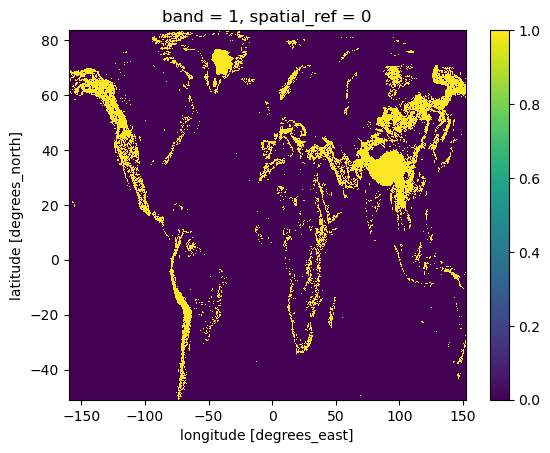

In [8]:
mt_match.plot()

In [9]:
import numpy as np

# Create a new raster array where the value is 1 for mountain regions with non-zero discharge
new_raster_array = np.logical_and(mt_match, dis_ds)

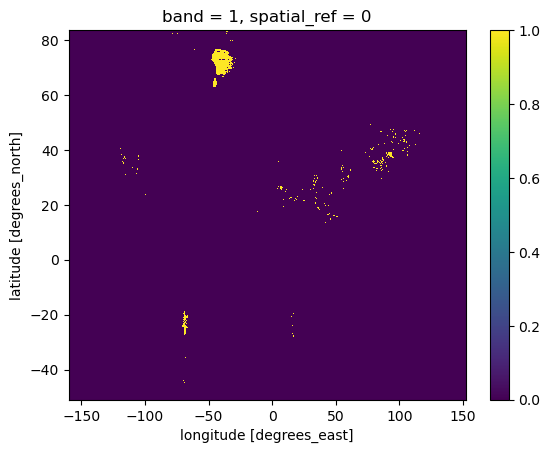

In [10]:
new_raster_array.plot()

In [11]:
import numpy as np

# Assuming raster_array_uint8 is the uint8 array and raster_array_uint64 is the uint64 array
dis_arr = dis_arr.astype(np.uint8)

NameError: name 'dis_arr' is not defined

In [18]:
mt_arr.shape

(21600, 43200)

In [26]:
mt_arr.sum()

105796489

In [4]:
import rasterio
import rioxarray
from rasterio.enums import Resampling
import numpy as np

def resample_raster_array(raster_array, target_shape):
    # Assuming raster_array is the original array and target_shape is the shape to resample to

    # Calculate the scale factors for resampling
    scale_x = raster_array.shape[1] / target_shape[1]
    scale_y = raster_array.shape[0] / target_shape[0]

    # Resample the array using rasterio.warp.reproject
    resampled_array = np.empty(target_shape, dtype=raster_array.dtype)
    rasterio.warp.reproject(
        source=raster_array,
        destination=resampled_array,
        src_transform=rasterio.Affine.scale(scale_x, scale_y),
        dst_transform=rasterio.Affine.identity(),
        src_crs='EPSG:4326',  # Replace with the CRS of your original raster
        dst_crs='EPSG:4326',  # Replace with the CRS you want to resample to
        resampling=Resampling.nearest,
    )

    return resampled_array

# Assuming raster_array_mountains is the binary array for mountain regions (0 or 1)
# and raster_array_discharge is the binary array for river discharge (0 or 1)

mountain_path = "../data/GlobalMountainsK3Binary/k1binary.tif"
mt_arr = rioxarray.open_rasterio(mountain_path)

dis_path = "../data/HydroRIVERS_v10_shp/raster/reduced_HydroRIVERS_v10.tif"
dis_arr = rioxarray.open_rasterio(dis_path)

# Resample one of the arrays to match the shape of the other array
# Choose the target shape based on the shape of the other array
target_shape = mt_arr.shape
dis_arr_resampled = resample_raster_array(dis_arr, target_shape)

# Create a new raster array where the value is 1 for mountain regions with non-zero discharge
new_raster_array = np.logical_and(mt_arr, dis_arr_resampled).astype(np.uint8)


In [31]:
new_raster_array.sum()

0

In [33]:
mt_arr.sum()

105796489

In [34]:
dis_arr.sum()

137711

In [35]:
dis_arr_resampled.sum()

1236

In [10]:
import rasterio
from rasterio.enums import Resampling

# Input file path
input_file = "../data/GlobalMountainsK3Binary/k1binary.tif"

# Open the raster file
with rasterio.open(input_file) as src:
    # Define the desired resolution
    new_resolution_x = 0.01
    new_resolution_y = -0.01

    # Calculate the new transform and dimensions for the resampled raster
    transform, width, height = rasterio.warp.calculate_default_transform(
        src.crs, src.crs, src.width, src.height, *src.bounds,
        resolution=(new_resolution_x, abs(new_resolution_y))
    )

    # Create the output raster file with the new resolution and transform
    kwargs = src.meta.copy()
    kwargs.update({
        'crs': src.crs,
        'transform': transform,
        'width': width,
        'height': height
    })

    # Set the path to the output raster file
    output_file = '../o/output_raster.tif'

    # Perform the reprojection and resampling
    with rasterio.open(output_file, 'w', **kwargs) as dst:
        for i in range(1, src.count + 1):
            rasterio.warp.reproject(
                source=rasterio.band(src, i),
                destination=rasterio.band(dst, i),
                src_transform=src.transform,
                src_crs=src.crs,
                dst_transform=transform,
                dst_crs=src.crs,  # Use the same CRS for the destination
                resampling=Resampling.bilinear
            )


RasterioIOError: Attempt to create new tiff file 'path/to/output_raster.tif' failed: No such file or directory